# **Classification Model Comparison: Decision Tree Vs Neural Networks**
## Assignment 1 - IN6227 Data Mining
### Gerry Julian - G2507395K
*Nanyang Technological University - Wee Kim Wee School of Communication and Information - MSIS*

**Objective : Train, test, and compare two classifiers using the provided dataset with classification models.**

***Chosen Classification Model : Decision Tree & Neural Networks***

There are several steps to completing this task. The process shown as follows:
1. Data Selection (Load Data)
2. Inspect Dataset (Before Cleaning)
3. Data Cleaning
4. Inspect Dataset (After Cleaning)
5. Data Preprocessing
6. Model Setup
7. Evaluate Models

### **1. Data Selection (Load Data)**

In [518]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import time
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,auc,precision_recall_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


# --------------------------
# Step 1: Load dataset
# --------------------------

data_path = "../data_source/adult.data"  # relative path to the file

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

df = pd.read_csv(data_path, names=columns, sep=r",\s*", engine="python")

print("First 5 rows of dataset:")
print(df.head())
print("Dataset shape:", df.shape)


First 5 rows of dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0  

### **2. Inspect Dataset (Before Cleaning)**

**2.1 Dataset Information**

In [519]:
# --------------------------
# Step 2: Inspect Dataset (Before Cleaning)
# --------------------------

# --------------------------
# 2.1: Dataset Overview
# --------------------------

# Dataset Information
print("\n--- Dataset Info ---")
print(df.info())

# Summary Statistics
print("\n--- Summary Statistics ---")
print(df.describe())

# Target Value Counts
print("\n--- Target Value Counts ---")
print(df['income'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

--- Summary Statistics ---
                age        fnlwgt  edu

**2.2 Check Duplicate Data**

In [520]:
# --------------------------
# 2.2: Check Duplicate Data
# --------------------------

# Check Duplicate Data
num_duplicates = df.duplicated().sum()
print("\n--- Check Duplicate Data ---")
print(f"Number of duplicate rows: {num_duplicates}")

# Find all duplicated rows (including all appearances)
duplicates = df[df.duplicated(keep=False)]

# Count frequency of each duplicated row
duplicate_counts = duplicates.value_counts().reset_index(name="count")

print("\n--- Duplicate Frequency ---")
print(f"Unique duplicated patterns: {duplicate_counts.shape[0]}")
print(duplicate_counts.head(50))  # Show top 10



--- Check Duplicate Data ---
Number of duplicate rows: 24

--- Duplicate Frequency ---
Unique duplicated patterns: 23
    age         workclass  fnlwgt     education  education-num  \
0    25           Private  195994       1st-4th              2   
1    19           Private   97261       HS-grad              9   
2    30           Private  144593       HS-grad              9   
3    49  Self-emp-not-inc   43479  Some-college             10   
4    49           Private   31267       7th-8th              4   
5    46           Private  173243       HS-grad              9   
6    46           Private  133616  Some-college             10   
7    44           Private  367749     Bachelors             13   
8    42           Private  204235  Some-college             10   
9    39           Private   30916       HS-grad              9   
10   38           Private  207202       HS-grad              9   
11   35           Private  379959       HS-grad              9   
12   28           Priva

**2.3 Check Missing Value**


--- Check Missing Values ---
Total missing values in dataset: 4262
Total rows with at least one missing value: 2399
Percentage of rows impacted by missing values: 7.37%
Percentage of missing values in the dataset: 0.87%

Missing values per column:
 workclass         1836
occupation        1843
native-country     583
dtype: int64

Columns with missing values (%):
 workclass         5.638647
occupation        5.660146
native-country    1.790486
dtype: float64


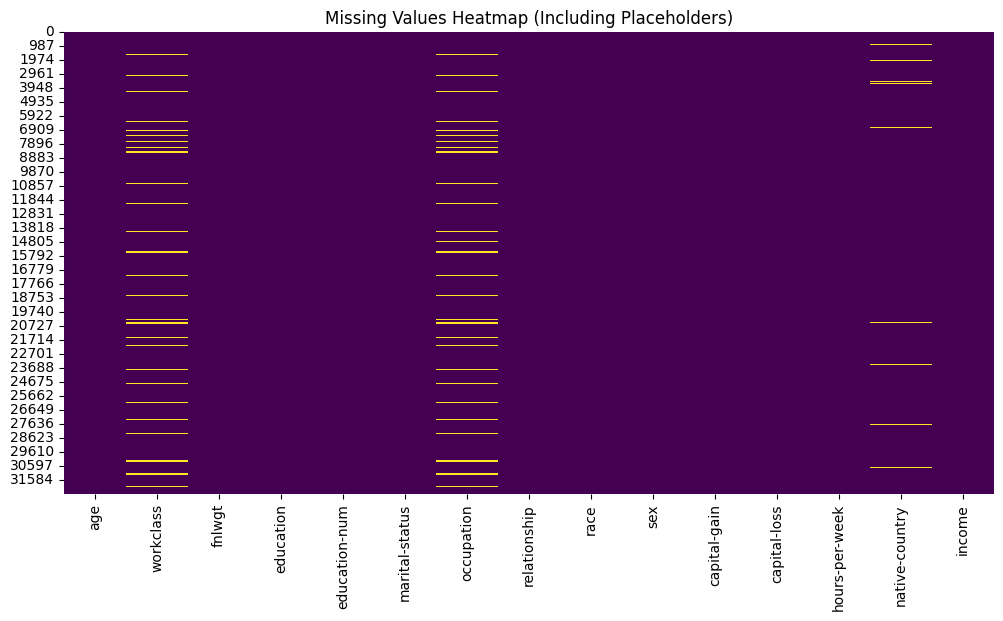

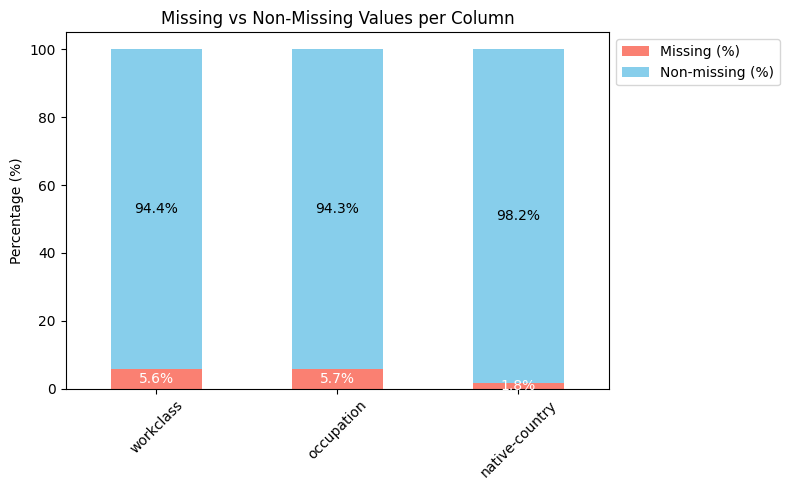

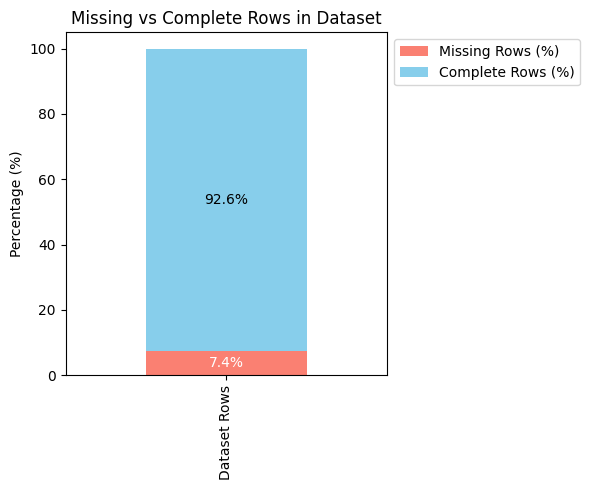

In [521]:
# --------------------------
# 2.3: Check Missing Values
# --------------------------

# Check Missing Values
missing_values = ["?", " ?", "NA", "NaN", "Empty", "null", "", " "]  # placeholders

# Count missing per column
missing_per_column = df.apply(lambda col: col.isin(missing_values).sum())
missing_per_column_nonzero = missing_per_column[missing_per_column > 0]

# Count total missing
total_missing = missing_per_column.sum()

# Missing per row
total_missing_rows = df.isin(missing_values).any(axis=1).sum()
percent_impacted_rows = (total_missing_rows / len(df)) * 100

# Missing per column
percentage_missing = (missing_per_column_nonzero / len(df)) * 100

# Total number of missing values in the dataset
total_missing = df.apply(lambda col: col.isin(missing_values).sum()).sum()

# Total number of cells in the dataset
total_cells = df.shape[0] * df.shape[1]

# Overall percentage of missing values
percentage_missing_total = (total_missing / total_cells) * 100

print("\n--- Check Missing Values ---")
print("Total missing values in dataset:", total_missing)
print("Total rows with at least one missing value:", total_missing_rows)
print(f"Percentage of rows impacted by missing values: {percent_impacted_rows:.2f}%")
print(f"Percentage of missing values in the dataset: {percentage_missing_total:.2f}%")
print("\nMissing values per column:\n", missing_per_column_nonzero)
print("\nColumns with missing values (%):\n", percentage_missing)


# Visualization 1: Heatmap
missing_bool = df.isin(missing_values)
plt.figure(figsize=(12,6))
sns.heatmap(missing_bool, cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Including Placeholders)")
plt.show()

# Visualization 2: Column-wise Stacked Bar

non_missing_per_column = df.shape[0] - missing_per_column_nonzero

stacked_col_df = pd.DataFrame({
    "Missing (%)": percentage_missing,
    "Non-missing (%)": 100 - percentage_missing
})

ax = stacked_col_df.plot(kind='bar', stacked=True, figsize=(8,5), color=["salmon", "skyblue"])
plt.ylabel("Percentage (%)")
plt.title("Missing vs Non-Missing Values per Column")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Add percentage values on bars
for i, row in enumerate(stacked_col_df.values):
    # Missing at bottom
    ax.text(i, row[0]/2, f"{row[0]:.1f}%", ha='center', va='center', color='white', fontsize=10)
    # Non-missing on top
    ax.text(i, row[0] + row[1]/2, f"{row[1]:.1f}%", ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


# Visualization 3: Row-wise Stacked Bar
rows_with_missing = (missing_bool.any(axis=1)).sum()
rows_no_missing = df.shape[0] - rows_with_missing

row_percentages = pd.DataFrame({
    "Missing Rows (%)": [rows_with_missing / df.shape[0] * 100],
    "Complete Rows (%)": [rows_no_missing / df.shape[0] * 100]
})

ax2 = row_percentages.plot(kind='bar', stacked=True, figsize=(6,5), color=["salmon", "skyblue"])
plt.ylabel("Percentage (%)")
plt.title("Missing vs Complete Rows in Dataset")
plt.xticks([0], ["Dataset Rows"])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Add percentage values
for i, row in enumerate(row_percentages.values):
    ax2.text(i, row[0]/2, f"{row[0]:.1f}%", ha='center', va='center', color='white', fontsize=10)
    ax2.text(i, row[0] + row[1]/2, f"{row[1]:.1f}%", ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


## 3. Data Cleaning

**3.1 Remove Duplicate Data**

In [522]:
# --------------------------
# Step 3: Data Cleaning
# --------------------------

# --------------------------
# 3.1: Remove Duplicate Data
# --------------------------

# ℹ️ Show dataset info before cleaning
print("Original df shape (before removing duplicates):", df.shape)
print("Number of duplicate rows:", df.duplicated().sum())

# 1. All rows that are part of duplicates (every copy, not just the extra ones)
duplicates_removed = df[df.duplicated(keep=False)]

# 2. Cleaned dataset (keeps only 1 copy of each row, removes the extras)
df_no_duplicates = df.drop_duplicates()

# 3. Only the removed copies (i.e., the duplicates beyond the first appearance)
removed_duplicates_only = df[df.duplicated(keep='first')]

# ✅ Update df to be the cleaned dataset
df = df_no_duplicates.copy()


print("\nRemove Duplicate Data Successful!")

# ℹ️ Show dataset info after cleaning
print("\nUpdated df shape (after removing duplicates):", df.shape)
print("Removed duplicates shape:", removed_duplicates_only.shape)

Original df shape (before removing duplicates): (32561, 15)
Number of duplicate rows: 24

Remove Duplicate Data Successful!

Updated df shape (after removing duplicates): (32537, 15)
Removed duplicates shape: (24, 15)


**3.2 Drop Missing Values**

In [523]:
# --------------------------
# 3.2: Drop Missing Values
# --------------------------

# Check Missing Values
print("Shape before dropping missing values:", df.shape)
missing_values = ["?", " ?", "NA", "NaN", "Empty", "null", "", " "]  # placeholders

# Count total missing
total_missing = missing_per_column.sum()

# Missing per row
total_missing_rows = df.isin(missing_values).any(axis=1).sum()
percent_impacted_rows = (total_missing_rows / len(df)) * 100

print("\n--- Check Missing Values ---")
print("Total missing values in dataset:", total_missing)
print("Total rows with at least one missing value:", total_missing_rows)
print(f"Percentage of rows impacted by missing values: {percent_impacted_rows:.2f}%")
print(f"Percentage of missing values in the dataset: {percentage_missing_total:.2f}%")

# Drop rows impacted by missing values and update df
df = df[~df.isin(missing_values).any(axis=1)].copy()

# Show shape after dropping missing rows
print("\n--- After Dropping Missing Values ---")
print("Shape of dataset after drop:", df.shape)

Shape before dropping missing values: (32537, 15)

--- Check Missing Values ---
Total missing values in dataset: 4262
Total rows with at least one missing value: 2398
Percentage of rows impacted by missing values: 7.37%
Percentage of missing values in the dataset: 0.87%

--- After Dropping Missing Values ---
Shape of dataset after drop: (30139, 15)


### **4. Inspect Data (After Cleaning)**

In [524]:
# --------------------------
# Step 4: Inspect Dataset (After Cleaning)
# --------------------------

# Dataset Information
print("\n--- Dataset Info ---")
print(df.info())

# Summary Statistics
print("\n--- Summary Statistics ---")
print(df.describe())

# Target Value Counts
print("\n--- Target Value Counts ---")
print(df['income'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

--- Summary Statistics ---
                age        fnlwgt  educatio

### **5.Data Preprocessing**

**5.1 Prepare Features and Target**

In [525]:
#---------------------------
# Step 5: Data Preprocessing
#---------------------------

# --------------------------
# 5.1: Prepare Features and Target
# --------------------------


# For Decision Tree

# Seperate features and target
X_dt = df.drop("income", axis=1)
y_dt = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

# For Neural Network

# Separate features and target
X_nn = df.drop("income", axis=1)
y_nn = df["income"].apply(lambda x: 1 if x==">50K" else 0)

**5.2 Label Encoding (for Decision Tree)**

In [526]:
# --------------------------
# 5.2: Label Encoding (for Decision Tree)
# --------------------------

# Label encode categorical columns
categorical_cols = X_dt.select_dtypes(include="object").columns
le = LabelEncoder()
for col in categorical_cols:
    X_dt[col] = le.fit_transform(X_dt[col])

# Dataset Information
print("\n--- Dataset Info ---")
print(X_dt.info())




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
dtypes: int64(14)
memory usage: 3.4 MB
None


**5.3 One-Hot Encoding (for NN)**

Decision Trees can handle categorical data in some libraries, but Neural Networks require numerical input. 

So we’ll convert categorical features using One-Hot Encoding. In this case, we transform 15 column into 104 dummy column


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Columns: 104 entries, age to native-country_Yugoslavia
dtypes: bool(98), int64(6)
memory usage: 4.4 MB
None


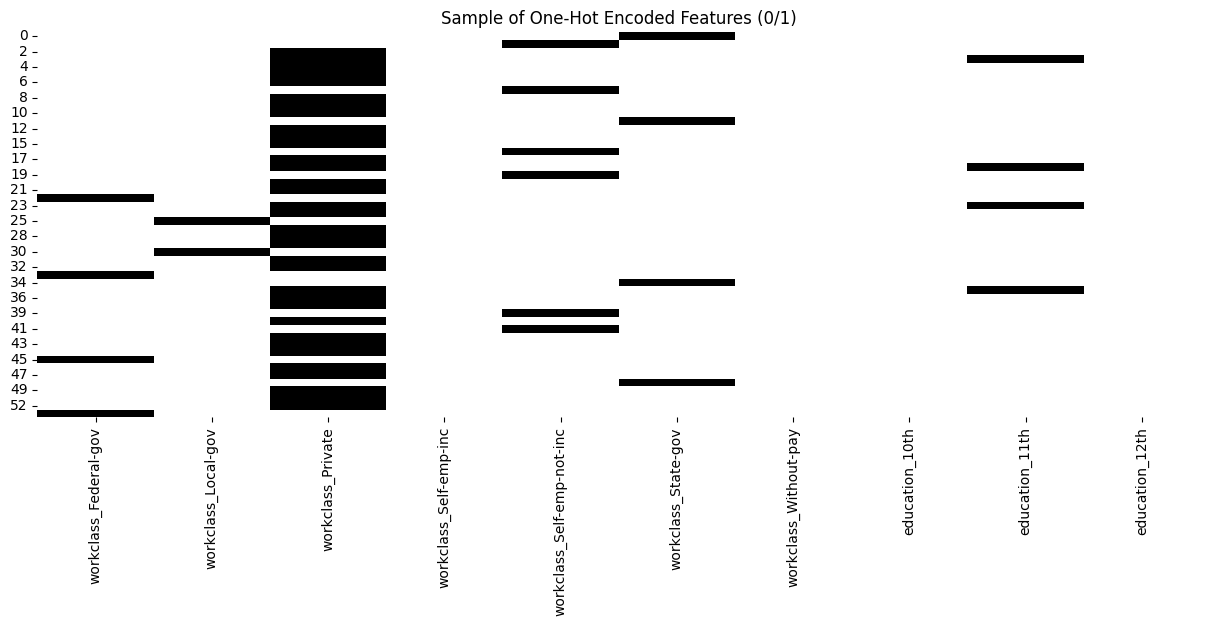

In [527]:
# --------------------------
# 5.3: One-Hot Encoding (for Neural Network)
# --------------------------

# Identify categorical columns
categorical_cols = X_nn.select_dtypes(include='object').columns

# One-hot encoding for categorical features
X_nn = pd.get_dummies(X_nn, columns=categorical_cols)


# Dataset Information
print("\n--- Dataset Info ---")
print(X_nn.info())

# Separate numeric and one-hot columns
numeric_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
onehot_cols = [col for col in X_nn.columns if col not in numeric_cols]

# 2️⃣ One-hot features distribution (sample 10 columns to avoid clutter)
plt.figure(figsize=(15, 5))
sns.heatmap(X_nn[onehot_cols[:10]].head(50), cmap="Greys", cbar=False)
plt.title("Sample of One-Hot Encoded Features (0/1)")
plt.show()




**5.4 Feature Scaling (for NN)**

Neural Networks benefit from scaled input features. Decision Trees do not require scaling.

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=104)


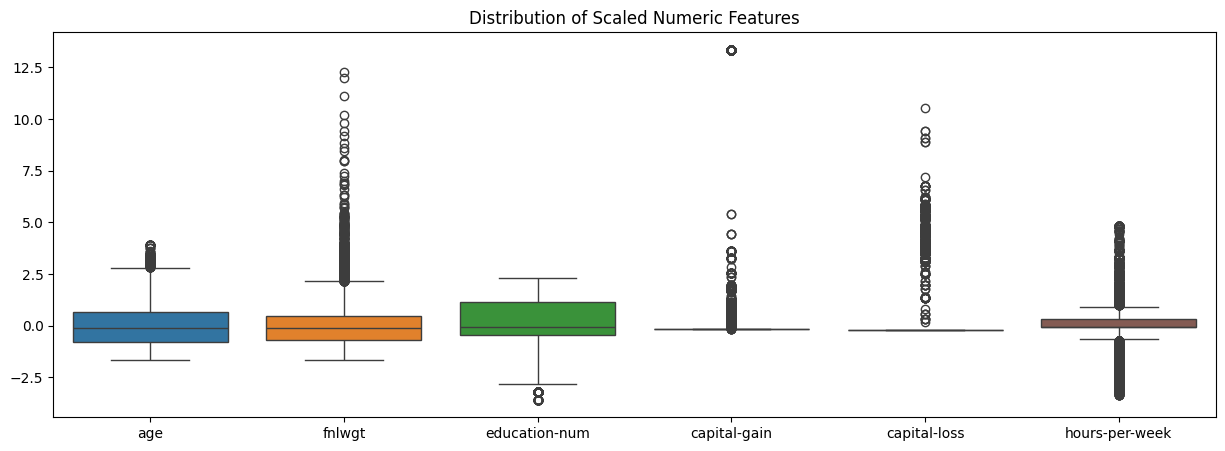

In [528]:
# --------------------------
# 5.4: Feature Scaling (for Neural Network)
# --------------------------
scaler = StandardScaler() 
numeric_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
X_nn[numeric_cols] = scaler.fit_transform(X_nn[numeric_cols])

print(X_nn.columns)

X_nn[numeric_cols].describe()

# 1️⃣ Numeric features distribution
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_nn[numeric_cols])
plt.title("Distribution of Scaled Numeric Features")
plt.show()


### **6. Model Setup**

**6.1 Split Dataset**

In [529]:
# --------------------------
# 6.1 : Train-Test Split
# --------------------------

#Decision Tree Train-Test Split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt
)

print("Decision Tree training set:", X_train_dt.shape, y_train_dt.shape)
print("Decision Tree testing set:", X_test_dt.shape, y_test_dt.shape)

# Neural Netowork Train-Test Split
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42, stratify=y_nn
)

print("Training set shape (for NN):", X_nn_train.shape, y_nn_train.shape)
print("Testing set shape (for NN):", X_nn_test.shape, y_nn_test.shape)



Decision Tree training set: (24111, 14) (24111,)
Decision Tree testing set: (6028, 14) (6028,)
Training set shape (for NN): (24111, 104) (24111,)
Testing set shape (for NN): (6028, 104) (6028,)


**6.2 Neural Network Training**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Neural Network model trained successfully with GridSearchCV!
⏱ Training time: 12.68 seconds
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Iterations until stop: 23
Training loss: 0.2513


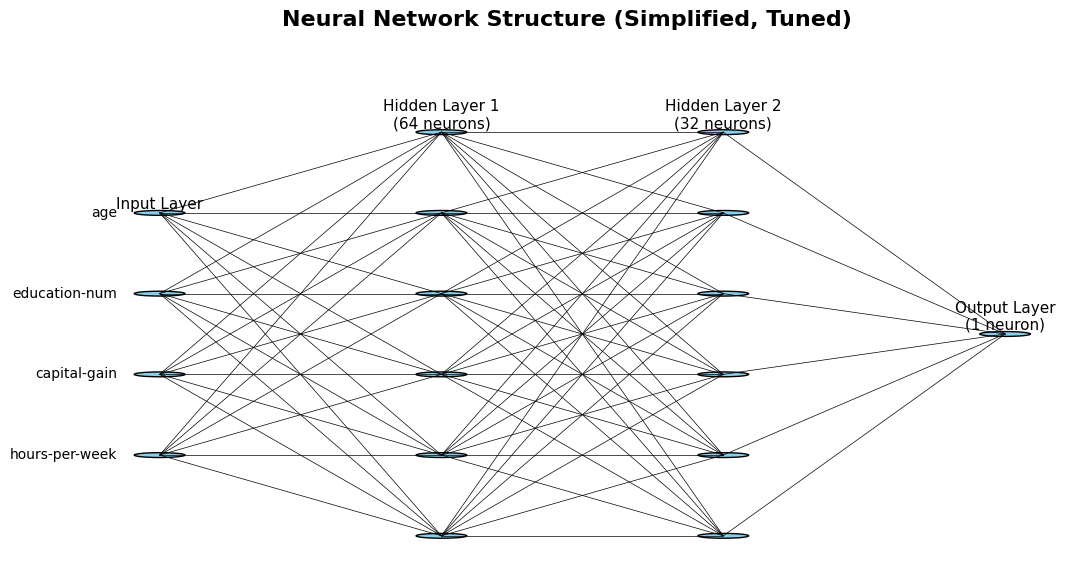

In [530]:
# --------------------------
# 6.2 : Neural Network Training with GridSearchCV
# --------------------------
nn_start_time = time.time()

# Define parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (128, 128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500],  # keep reasonable for GridSearch
}

# Initialize base MLPClassifier
base_nn = MLPClassifier(
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20,
    verbose=False
)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=base_nn,
    param_grid=param_grid,
    scoring='accuracy',  # or 'f1' depending on your goal
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train model with grid search
grid_search.fit(X_nn_train, y_nn_train)

nn_train_time = time.time() - nn_start_time

# Best model
nn_model = grid_search.best_estimator_

print("✅ Neural Network model trained successfully with GridSearchCV!")
print(f"⏱ Training time: {nn_train_time:.2f} seconds")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Iterations until stop: {nn_model.n_iter_}")
print(f"Training loss: {nn_model.loss_:.4f}")

# -------------------------------
# Plot best NN
# -------------------------------
fig, ax = plt.subplots(figsize=(12,6))
ax.axis('off')
plt.subplots_adjust(top=0.85)

draw_nn_clean(ax, nn_model.hidden_layer_sizes, sample_features, 1)

plt.suptitle("Neural Network Structure (Simplified, Tuned)", fontsize=16, fontweight='bold', y=1.02)
plt.show()


**6.3 Decision Tree**

Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Decision Tree model trained successfully with GridSearchCV!
⏱ Training time: 2.2657 seconds
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Number of nodes in tree: 55
Max depth of tree: 5

Feature importance Calculation:
relationship      0.456954
capital-gain      0.227471
education-num     0.224937
capital-loss      0.060251
hours-per-week    0.023259
occupation        0.003395
age               0.003109
fnlwgt            0.000626
workclass         0.000000
education         0.000000
marital-status    0.000000
race              0.000000
sex               0.000000
native-country    0.000000
dtype: float64


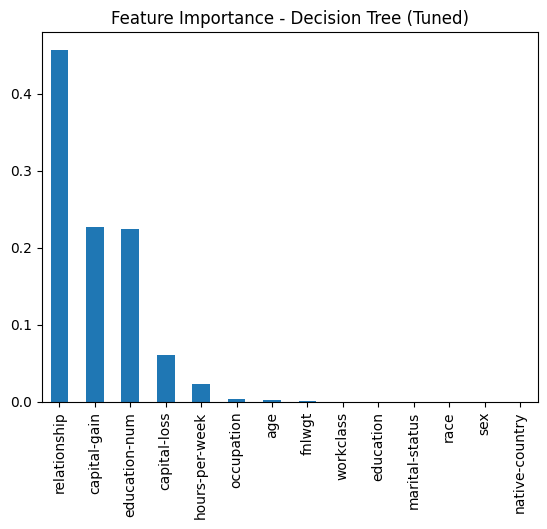

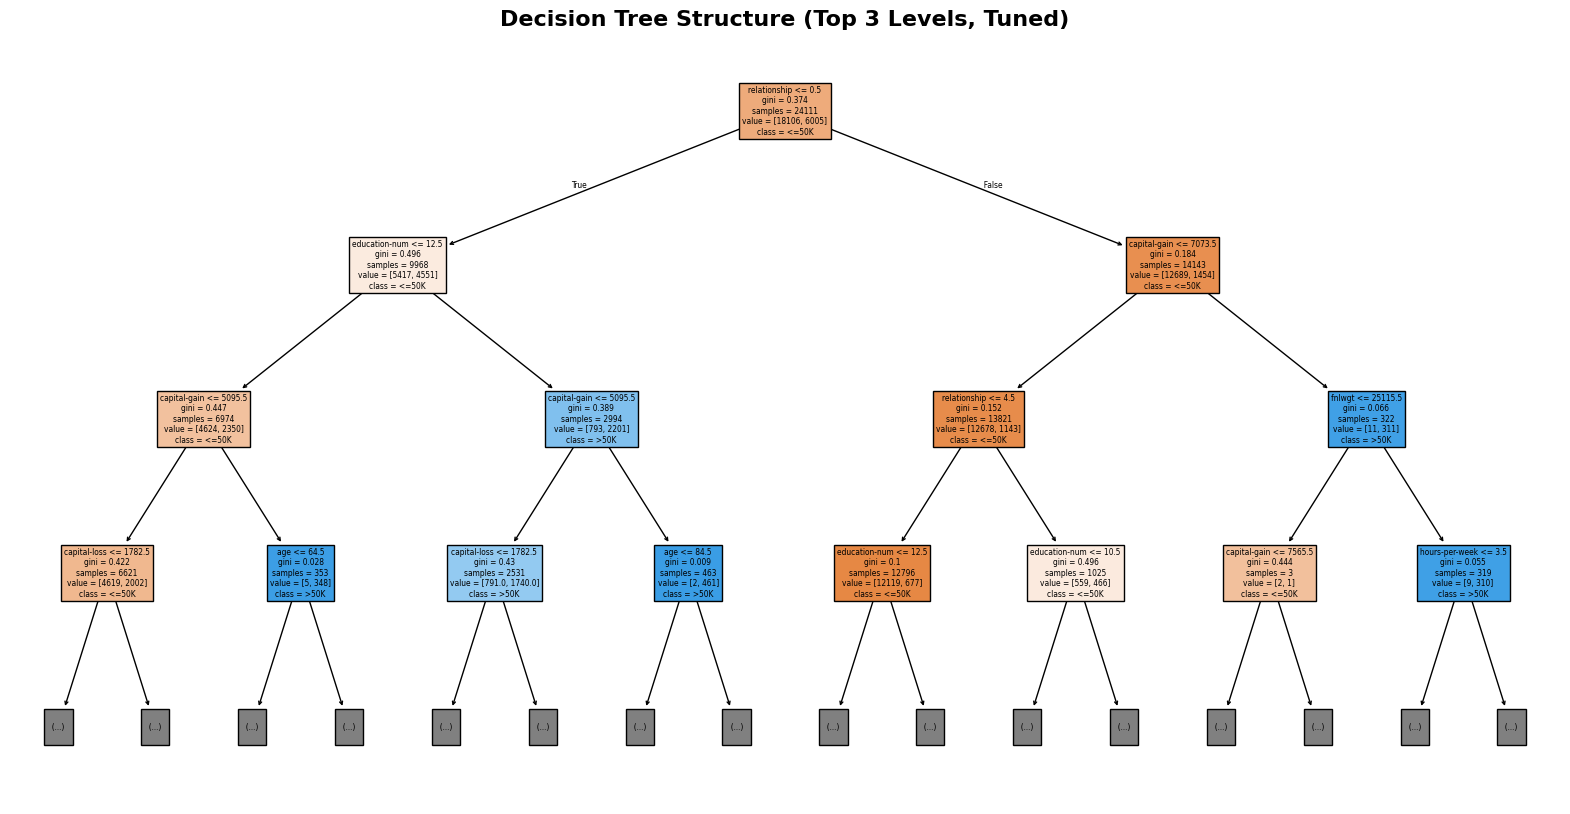

In [531]:
# --------------------------
# 6.3 : Decision Tree Training with GridSearchCV
# --------------------------
dt_start_time = time.time()

# Parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Base Decision Tree
dt_base = DecisionTreeClassifier(random_state=42)

# GridSearchCV setup
grid_search_dt = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    scoring='accuracy',  # or 'f1'
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train model with grid search
grid_search_dt.fit(X_train_dt, y_train_dt)

dt_train_time = time.time() - dt_start_time

# Best model
dt_model = grid_search_dt.best_estimator_

print("✅ Decision Tree model trained successfully with GridSearchCV!")
print(f"⏱ Training time: {dt_train_time:.4f} seconds")
print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Number of nodes in tree: {dt_model.tree_.node_count}")
print(f"Max depth of tree: {dt_model.tree_.max_depth}")

# Feature importance
print("\nFeature importance Calculation:")
importances = dt_model.feature_importances_
feature_names = X_dt.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp)

# Optional: visualize feature importance
feat_imp.plot(kind='bar')
plt.title("Feature Importance - Decision Tree (Tuned)")
plt.show()

# visualize top 3 levels
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X_dt.columns,
    class_names=['<=50K', '>50K'],
    filled=True,
    max_depth=3  # only top 3 levels for readability
)
plt.title("Decision Tree Structure (Top 3 Levels, Tuned)", fontsize=16, fontweight='bold')
plt.show()


### **7. Evaluate Models**

**7.1 Model Prediction & Metrics**

In [532]:
# --------------------------
# Step 7: Evaluate Models
# --------------------------


# --------------------------
# 7.1 : Model Prediction and Metrics
# --------------------------

# --- Decision Tree Prediction ---
start_time = time.time()
y_dt_pred = dt_model.predict(X_test_dt)
dt_pred_time = time.time() - start_time

# -------------------------------
# DT Metrics
# -------------------------------
dt_accuracy = accuracy_score(y_test_dt, y_dt_pred)
dt_precision = precision_score(y_test_dt, y_dt_pred)
dt_recall = recall_score(y_test_dt, y_dt_pred)
dt_f1 = f1_score(y_test_dt, y_dt_pred)

print("\n--- Decision Tree Report ---")
print(classification_report(y_test_dt, y_dt_pred))
print(f"⏱ Prediction time: {dt_pred_time:.6f} seconds")


# --- Neural Network Prediction ---
start_time = time.time()
y_nn_pred = nn_model.predict(X_nn_test)
nn_pred_time = time.time() - start_time

# -------------------------------
# NN Metrics
# -------------------------------
nn_accuracy = accuracy_score(y_nn_test, y_nn_pred)
nn_precision = precision_score(y_nn_test, y_nn_pred)
nn_recall = recall_score(y_nn_test, y_nn_pred)
nn_f1 = f1_score(y_nn_test, y_nn_pred)

print("\n--- Neural Network Report ---")
print(classification_report(y_nn_test, y_nn_pred))
print(f"⏱ Prediction time: {nn_pred_time:.6f} seconds")





--- Decision Tree Report ---
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4527
           1       0.78      0.53      0.63      1501

    accuracy                           0.85      6028
   macro avg       0.82      0.74      0.77      6028
weighted avg       0.84      0.85      0.84      6028

⏱ Prediction time: 0.001210 seconds

--- Neural Network Report ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4527
           1       0.75      0.60      0.67      1501

    accuracy                           0.85      6028
   macro avg       0.81      0.77      0.78      6028
weighted avg       0.84      0.85      0.84      6028

⏱ Prediction time: 0.003576 seconds


**7.2 Visual Comparison**

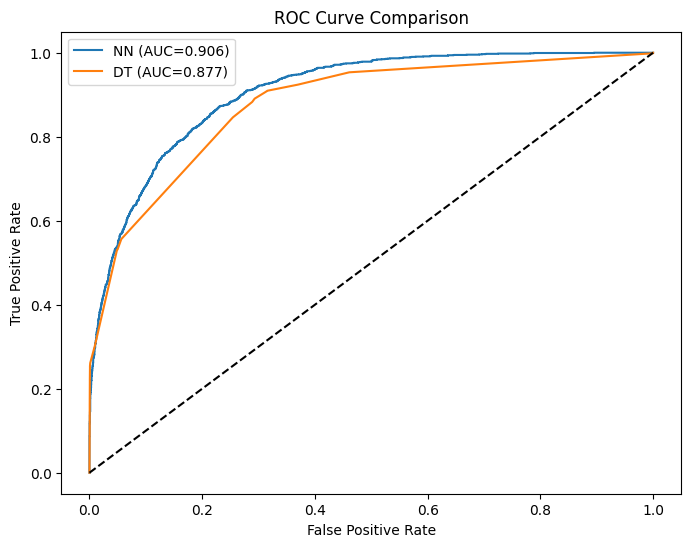

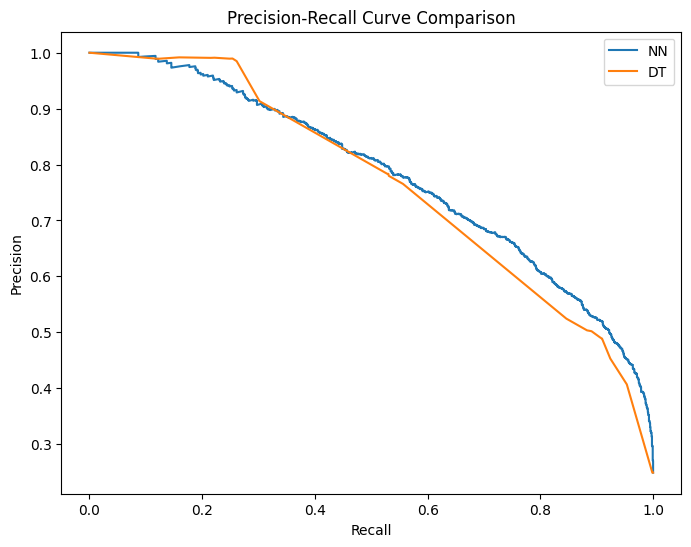

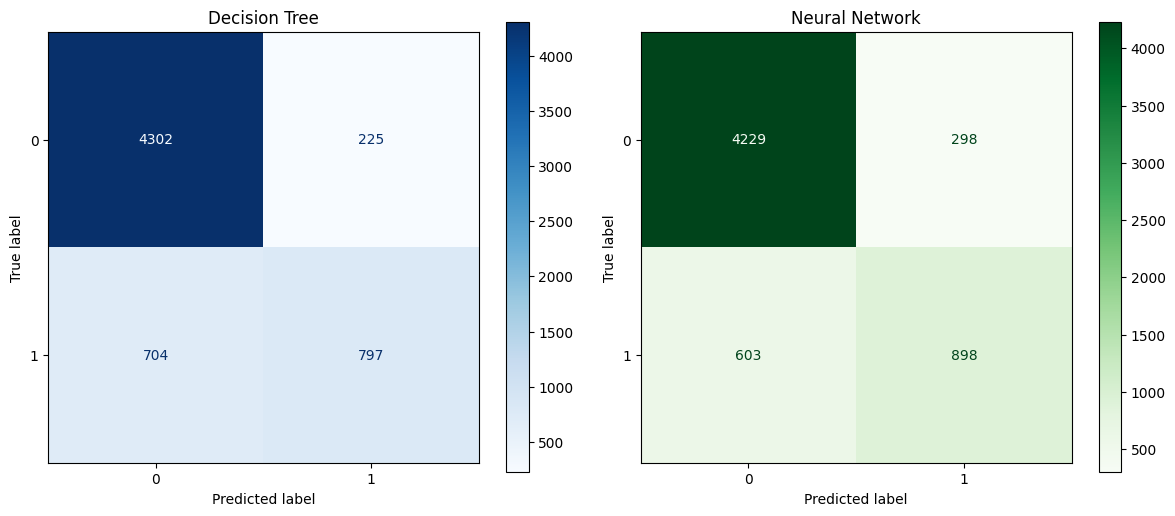

In [533]:
# --------------------------
# 7.2 : Visual Comparison
# --------------------------


# ----------------------------
# 1. ROC Curve
# ----------------------------
y_nn_prob = nn_model.predict_proba(X_nn_test)[:,1]
y_dt_prob = dt_model.predict_proba(X_test_dt)[:,1]

fpr_nn, tpr_nn, _ = roc_curve(y_nn_test, y_nn_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test_dt, y_dt_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_nn, tpr_nn, label=f"NN (AUC={auc(fpr_nn,tpr_nn):.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"DT (AUC={auc(fpr_dt,tpr_dt):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# ----------------------------
# 2. Precision-Recall Curve
# ----------------------------
prec_nn, rec_nn, _ = precision_recall_curve(y_nn_test, y_nn_prob)
prec_dt, rec_dt, _ = precision_recall_curve(y_test_dt, y_dt_prob)

plt.figure(figsize=(8,6))
plt.plot(rec_nn, prec_nn, label="NN")
plt.plot(rec_dt, prec_dt, label="DT")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

# ----------------------------
# 3. Confusion Matrix
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_dt, y_test_dt, ax=ax[0], cmap="Blues")
ax[0].set_title("Decision Tree")

# Neural Network
ConfusionMatrixDisplay.from_estimator(nn_model, X_nn_test, y_nn_test, ax=ax[1], cmap="Greens")
ax[1].set_title("Neural Network")

plt.tight_layout()
plt.show()


**7.3 Comparison Table with Winners**

In [534]:
# --------------------------
# 7.3 : Comparison Table with Winners
# --------------------------

results = pd.DataFrame({
    "Model": ["Neural Network", "Decision Tree"],
    "Accuracy": [nn_accuracy, dt_accuracy],
    "Precision": [nn_precision, dt_precision],
    "Recall": [nn_recall, dt_recall],
    "F1-Score": [nn_f1, dt_f1],
    "Training Time (s)": [nn_train_time, dt_train_time],
    "Prediction Time (s)": [nn_pred_time, dt_pred_time]
})


winners = []
for col in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    if results.loc[0, col] > results.loc[1, col]:
        winners.append("Neural Network")
    elif results.loc[0, col] < results.loc[1, col]:
        winners.append("Decision Tree")
    else:
        winners.append("Tie")

# Untuk waktu training & prediksi -> lebih kecil = lebih baik
for col in ["Training Time (s)", "Prediction Time (s)"]:
    if results.loc[0, col] < results.loc[1, col]:
        winners.append("Neural Network")
    elif results.loc[0, col] > results.loc[1, col]:
        winners.append("Decision Tree")
    else:
        winners.append("Tie")

# Tambahkan row pemenang
results.loc["Winner"] = ["--"] + winners

print("\n--- Comparison Table with Winners ---")
print(results)

# Tentukan best approach (siapa yang lebih sering menang)
winner_counts = pd.Series(winners).value_counts()
best_model = winner_counts.idxmax()

print(f"\n🏆 Best overall approach: {best_model}")


--- Comparison Table with Winners ---
                 Model        Accuracy      Precision          Recall  \
0       Neural Network        0.850531       0.750836        0.598268   
1        Decision Tree        0.845886       0.779843        0.530979   
Winner              --  Neural Network  Decision Tree  Neural Network   

              F1-Score Training Time (s) Prediction Time (s)  
0             0.665925         12.684564            0.003576  
1             0.631788           2.26573             0.00121  
Winner  Neural Network     Decision Tree       Decision Tree  

🏆 Best overall approach: Neural Network
